## Summer 2022 Data Science Intern Challenge

In [ ]:
# necessary imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from datetime import datetime

# required on Jupiter Notebook
%matplotlib inline


width, height = 15, 6 # display images dimensions
plt.rcParams['figure.figsize'] = [width, height]

### Q1

In [ ]:
# data source provided in challenge
sheet_url = "https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0"

url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [ ]:
# read data in and set "created_at" as the index column. This makes it easier to access data by passing date as key to dataframe
shops_df = pd.read_csv(url_1 , index_col='created_at')

# convert string datetime to timestamp, so we can access data for each date directly from dataframe
shops_df.index = [pd.to_datetime(x) for x in shops_df.index]

In [ ]:
shops_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method
2017-03-13 12:36:56,1,53,746,224,2,cash
2017-03-03 17:38:52,2,92,925,90,1,cash
2017-03-14 04:23:56,3,44,861,144,1,cash
2017-03-26 12:43:37,4,18,935,156,1,credit_card
2017-03-01 04:35:11,5,18,883,156,1,credit_card


In [ ]:
# check if there are null or empty records in any column
for c in shops_df.columns:
    print(c," : ", shops_df[c].isna().sum()) # get count of NA records and sum them

order_id  :  0
shop_id  :  0
user_id  :  0
order_amount  :  0
total_items  :  0
payment_method  :  0


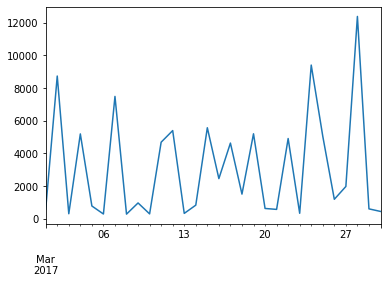

In [ ]:
# look at mean by daily
shops_df.resample('D').mean()['order_amount'].plot()

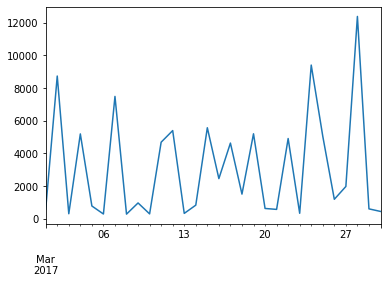

In [ ]:
shops_df.resample('D').mean()['order_amount'].plot()

[]

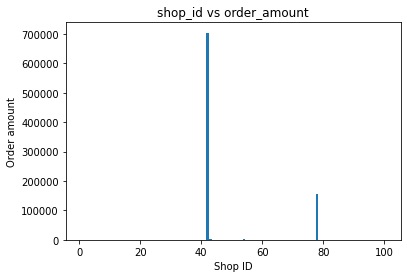

In [ ]:
# check visually what order amounts look like for each shop
plt.title("shop_id vs order_amount")
plt.xlabel("Shop ID")
plt.ylabel("Order amount")
plt.bar(shops_df['shop_id'], shops_df['order_amount'])
plt.plot()

In bar plot above we can see that, there are two anomaly records shop_id 41 and 78.
These two shops can make the total average way off, as the average is the sum of all order amounts by each shop and then divided by the total number of shops.
These anomaly records can be a error in typing or just very expensive shoes.

In [ ]:
# we can look at the maximum value here
shops_df['order_amount'].max()

704000

In [ ]:
# minimum seems like its not too far from average
shops_df['order_amount'].min()

90

In [ ]:
# here is the mean value
shops_df['order_amount'].mean()

3145.128

In [ ]:
# mode is the most common value in the range
shops_df['order_amount'].mode()

0    153
dtype: int64

In [ ]:
# median is the middle of the set of numbers, which I think is the better approach for this problem
shops_df['order_amount'].median()

284.0

## Q2

How many orders were shipped by Speedy Express in total?

In [ ]:
# SELECT COUNT(Orders.OrderID) AS CountOfOrders
# FROM Orders
# LEFT JOIN Shippers on Orders.ShipperID = Shippers.ShipperID
# WHERE Shippers.ShipperName = 'Speedy Express'

# answer -> 54

What is the last name of the employee with the most orders?

In [ ]:
# SELECT LastName, MAX(NumberOfOrders)
# FROM (SELECT Employees.LastName, COUNT(Orders.OrderID) as NumberOfOrders FROM [Orders] 
# INNER JOIN Employees ON Employees.EmployeeID = Orders.EmployeeID
# GROUP BY Employees.EmployeeID) p

# answer -> Peacock

What product was ordered the most by customers in Germany?

In [ ]:
# SELECT ProductName, MAX(CountOfProducts) AS MostBoughtProduct
# FROM 
# (
#     SELECT Products.ProductName, COUNT(Products.ProductID) AS CountOfProducts
#     FROM Customers
#     INNER JOIN Orders on Orders.CustomerID = Customers.CustomerID
#     INNER JOIN OrderDetails on OrderDetails.OrderID = Orders.OrderID
#     INNER JOIN Products on OrderDetails.ProductID = Products.ProductID
#     WHERE Customers.Country = 'Germany' 
#     GROUP BY Products.ProductID
# )

# answer -> Gorgonzola Telino